# 0.2.2 - List Price EDA

## Overview

This notebook reviews the `List Price` feature.

### Actions

- Perform EDA on the `List Price` feature.
- Obtain a histogram of the list price distribution across all records.
- Use binned ranges to determine response categories.
- Add `Price` feature with the labelled list price category.

### Dependencies

This notebook depends on:

- `data/interim/ecommerce_data-cleaned-0.2.1.csv`

### Targets

This notebook outputs:

- `data/interim/ecommerce_data-cleaned-0.2.2.csv`

## Setup

The following cells import required libraries for python analysis, import the module path to access the project's `src/` module scripts, and enable autoreloading for the hot-reloading of source files outside of the notebook. These are all optional and should be included if needed for development.

In [1]:
# Enable hot-reloading of external scripts.
%load_ext autoreload
%autoreload 2

# Import libraries.
import os, sys
from pathlib import Path
import pandas as pd
import numpy as np

# Import plotting library.
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')

# Add project to system PATH.
module_path = Path(".").resolve().parents[0]
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
    print('Module added to PATH: "{}".'.format(module_path))
else:
    print('Module already accessible from PATH "{}".'.format(module_path))

Module added to PATH: "D:\Repositories\rit\ISTE780\Project".


In [2]:
# Update the working directory to be the project root directory.
from pathlib import Path, PurePosixPath
PROJECT_DIR = Path.cwd().resolve().parents[0]
%cd {PROJECT_DIR}

D:\Repositories\rit\ISTE780\Project


In [3]:
# Import utilities.
from src.data import *
from src.features import *

In [4]:
# Get the dependency.
input_filepath = "data/interim/ecommerce_data-cleaned-0.2.1.csv" # get_interim_filepath("0.2.1", tag="cleaned")
df_input = pd.read_csv(input_filepath, index_col = 0)
df_input.info()
df_input.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29604 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         29045 non-null  object 
 1   name          29604 non-null  object 
 2   description   29552 non-null  object 
 3   category_raw  29588 non-null  object 
 4   price_raw     29604 non-null  float64
 5   discount_raw  29604 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.6+ MB


,brand,name,description,category_raw,price_raw,discount_raw
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81


In [5]:
list_price = df_input['price_raw']
describe_features.describe_price(list_price)

There are 0 records with missing list prices.
Quantiles: 0% [0.1], 25% [11.12], 50% [21.47], 75% [46.02], 100% [13280.81]
Inter-quartile Range: 34.900000000000006
Distance between Q4 and Q3: 13234.789999999999


count    29604.000000
mean        72.760576
std        319.713464
min          0.100000
25%         11.120000
50%         21.470000
75%         46.020000
max      13280.810000
Name: price_raw, dtype: float64

In [6]:
# Count below.
describe_features.count_below(list_price, 1)
describe_features.count_below(list_price, 10)
describe_features.count_below(list_price, list_price.quantile(0.25))
describe_features.count_below(list_price, list_price.quantile(0.50))

There are 47 products with prices less than or equal to 1
There are 6578 products with prices less than or equal to 10
There are 7406 products with prices less than or equal to 11.12
There are 14807 products with prices less than or equal to 21.47


In [7]:
# Count above.
describe_features.count_above(list_price, list_price.quantile(0.50))
describe_features.count_above(list_price, 100)
describe_features.count_above(list_price, 500)
describe_features.count_above(list_price, 2000)
describe_features.count_above(list_price, 10000)

There are 14797 products with prices greater than 21.47
There are 3279 products with prices greater than 100
There are 501 products with prices greater than 500
There are 157 products with prices greater than 2000
There are 2 products with prices greater than 10000


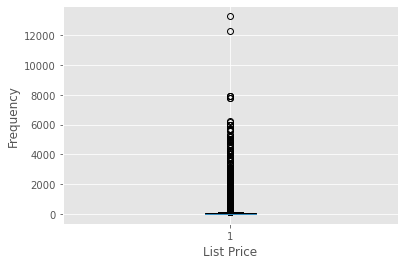

In [8]:
# Boxplot of outliers
fig, ax = plt.subplots(1, 1)
ax.boxplot(list_price)
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

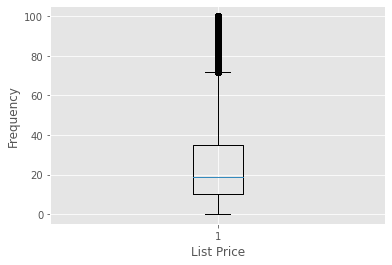

In [9]:
# Boxplot of outliers
mask = list_price > 100
fig, ax = plt.subplots(1, 1)
ax.boxplot(list_price[~mask])
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

We can see that $\approx \$70$ is the threshold for where values start to become outliers.

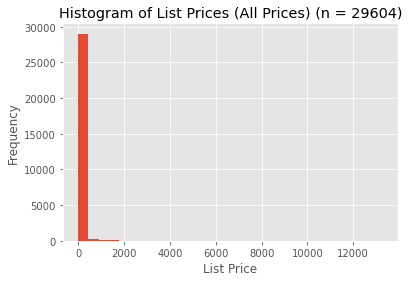

In [10]:
# Histogram of List Prices
fig, ax = plt.subplots(1, 1)
ax.hist(list_price, bins=30)
ax.set_title("Histogram of List Prices (All Prices) (n = {})".format(list_price.shape[0]))
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

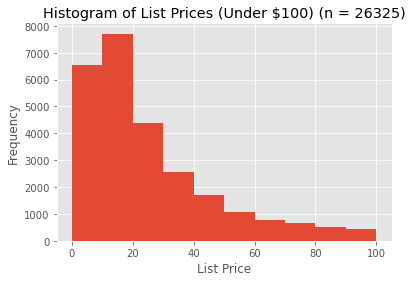

In [11]:
# Filtering out the outliers.
mask = list_price > 100
fig, ax = plt.subplots(1, 1)
ax.hist(list_price[~mask], bins=10, range=(0, 100))
ax.set_title("Histogram of List Prices (Under $100) (n = {})".format(list_price[~mask].shape[0]))
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

A vast majority ($n = 26325$) of the dataset is above $\$100$.

In [12]:
# Encode the prices into a price label.
price_range = build_features.encode_price(df_input['price_raw'])
print("There are {} products with missing labels.".format(price_range.isna().sum()))

There are 0 products with missing labels.


In [13]:
df_labelled = pd.concat([df_input, price_range], axis=1)
df_labelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29604 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand         29045 non-null  object  
 1   name          29604 non-null  object  
 2   description   29552 non-null  object  
 3   category_raw  29588 non-null  object  
 4   price_raw     29604 non-null  float64 
 5   discount_raw  29604 non-null  float64 
 6   price_range   29604 non-null  category
dtypes: category(1), float64(2), object(4)
memory usage: 1.6+ MB


## Save Interim Dataset

The dataset has now been labelled appropriately.

In [14]:
# Save the file
df_output = df_labelled
save_interim(df_output, "0.2.2")

Saving (cleaned) dataframe (29604, 7) to D:\Repositories\rit\ISTE780\Project\data\interim\ecommerce_data-cleaned-0.2.2.csv.
File saved.
